# Classifying Traffic Signs using Le-Net Architecture in Keras
**Author** : Rahul Bordoloi

**Notebook used** : Google Colab

# Problem Statement

- In this case study, we have been provided with images of traffic signs and the goal is to train a Deep Network to classify them.
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# Importing Datasets and Libraries

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
#import frequently used libraries 
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
import random

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/content/drive/My Drive/Data Science/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Data Science/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Data Science/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
#spliting datasets into train, test and validation
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
print(X_validation.shape)
print(X_test.shape)

(4410, 32, 32, 3)
(12630, 32, 32, 3)


# Image Exploration

36

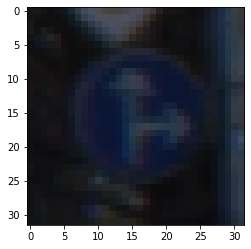

In [0]:
#checking out a random image
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

4

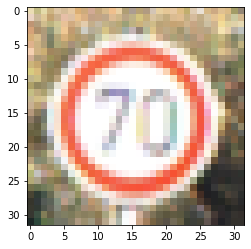

In [0]:
#checking out a random image [integity checking]
i = 7998
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# Data Preperation / pre-Processing

In [0]:
#shuffling the dataset to avoid patterns 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
#preserving the pictures and converting into grayscale for faster preprocessing
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [0]:
X_train_gray.shape

(34799, 32, 32, 1)

In [0]:
#obtaining central value within the pixels (pixel range = [-1,1])
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

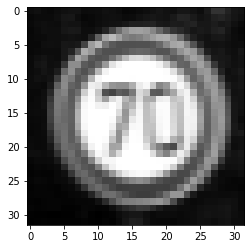

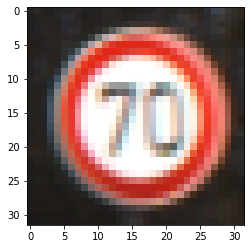

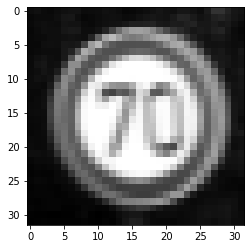

In [0]:
#comparing the grayscale image, the original image and the normalised image
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')  #numpy.squeeze is used to remove unneccessary dimensions
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# Model Training

** Le-Net Network Basic Architecture**

The model consists of the following layers: 

- 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Using a 5x5 Filter with input depth of 3 and output depth of 6
    - Applying a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Applying a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- 3: FLATTENING THE NETWORK
    - Flattening the network with Input = 5x5x16 and Output = 400

- 4: FULLY CONNECTED LAYER (Dense Layer)
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Applying a RELU Activation function to the output

- 5: ANOTHER FULLY CONNECTED LAYER (Dense Layer)
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Applying a RELU Activation function to the output

- 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

Note : All the numbers are pre-defined in the Le-Net Network Architecture

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
#importing libraries for the Neural Network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
#building the Le-Net Architecture Model
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [0]:
#compiling the different layers
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [0]:
#fitting the model to the test set
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/50





34799/34799 [==============================] - 14s 391us/step - loss: 3.1319 - acc: 0.1841 - val_loss: 2.7051 - val_acc: 0.2832
Epoch 2/50
34799/34799 [==============================] - 13s 365us/step - loss: 1.7241 - acc: 0.5249 - val_loss: 1.5462 - val_acc: 0.5662
Epoch 3/50
34799/34799 [==============================] - 13s 362us/step - loss: 1.0181 - acc: 0.7080 - val_loss: 1.2279 - val_acc: 0.6329
Epoch 4/50
34799/34799 [==============================] - 13s 369us/step - loss: 0.7470 - acc: 0.7864 - val_loss: 1.0633 - val_acc: 0.6834
Epoch 5/50
34799/34799 [==============================] - 13s 364us/step - loss: 0.6022 - acc: 0.8305 - val_loss: 0.9292 - val_acc: 0.7370
Epoch 6/50
34799/34799 [==============================] - 13s 367us/step - loss: 0.5072 - acc: 0.8557 - val_loss: 0.8501 - val_acc: 0.7542
Epoch 7/50
3479

# STEP 5: MODEL EVALUATION

In [0]:
#obtaining the accuracy of the model
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8449


In [0]:
#keys in the evalute() dictionary
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

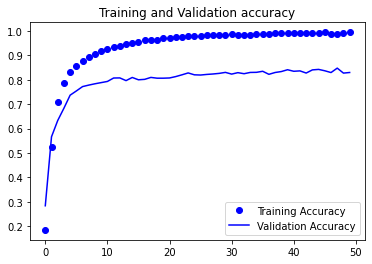

In [0]:
#plotting a graph to study b/w Training Accuracy and Validation Accuracy wrt no. of epochs passed
accuracy = history.history['acc']          #aacuracy
val_accuracy = history.history['val_acc']  #validation
loss = history.history['loss']             #loss
val_loss = history.history['val_loss']     #validation loss

epochs = range(len(accuracy))              #no of epochs

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')         #dotted lines , b -> blue
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')    #bold lines
plt.title('Training and Validation accuracy')
plt.legend()

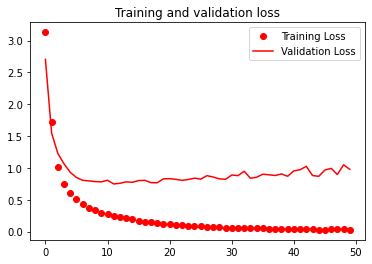

In [0]:
#plotting a graph to study b/w Training Loss and Validation Loss wrt no. of epochs passed
plt.plot(epochs, loss, 'ro', label='Training Loss')         #loss , r -> red
plt.plot(epochs, val_loss, 'r', label='Validation Loss')    #validation loss
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#getting the classes predicted by the model
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#getting the indices of the classes of images
y_true = y_test

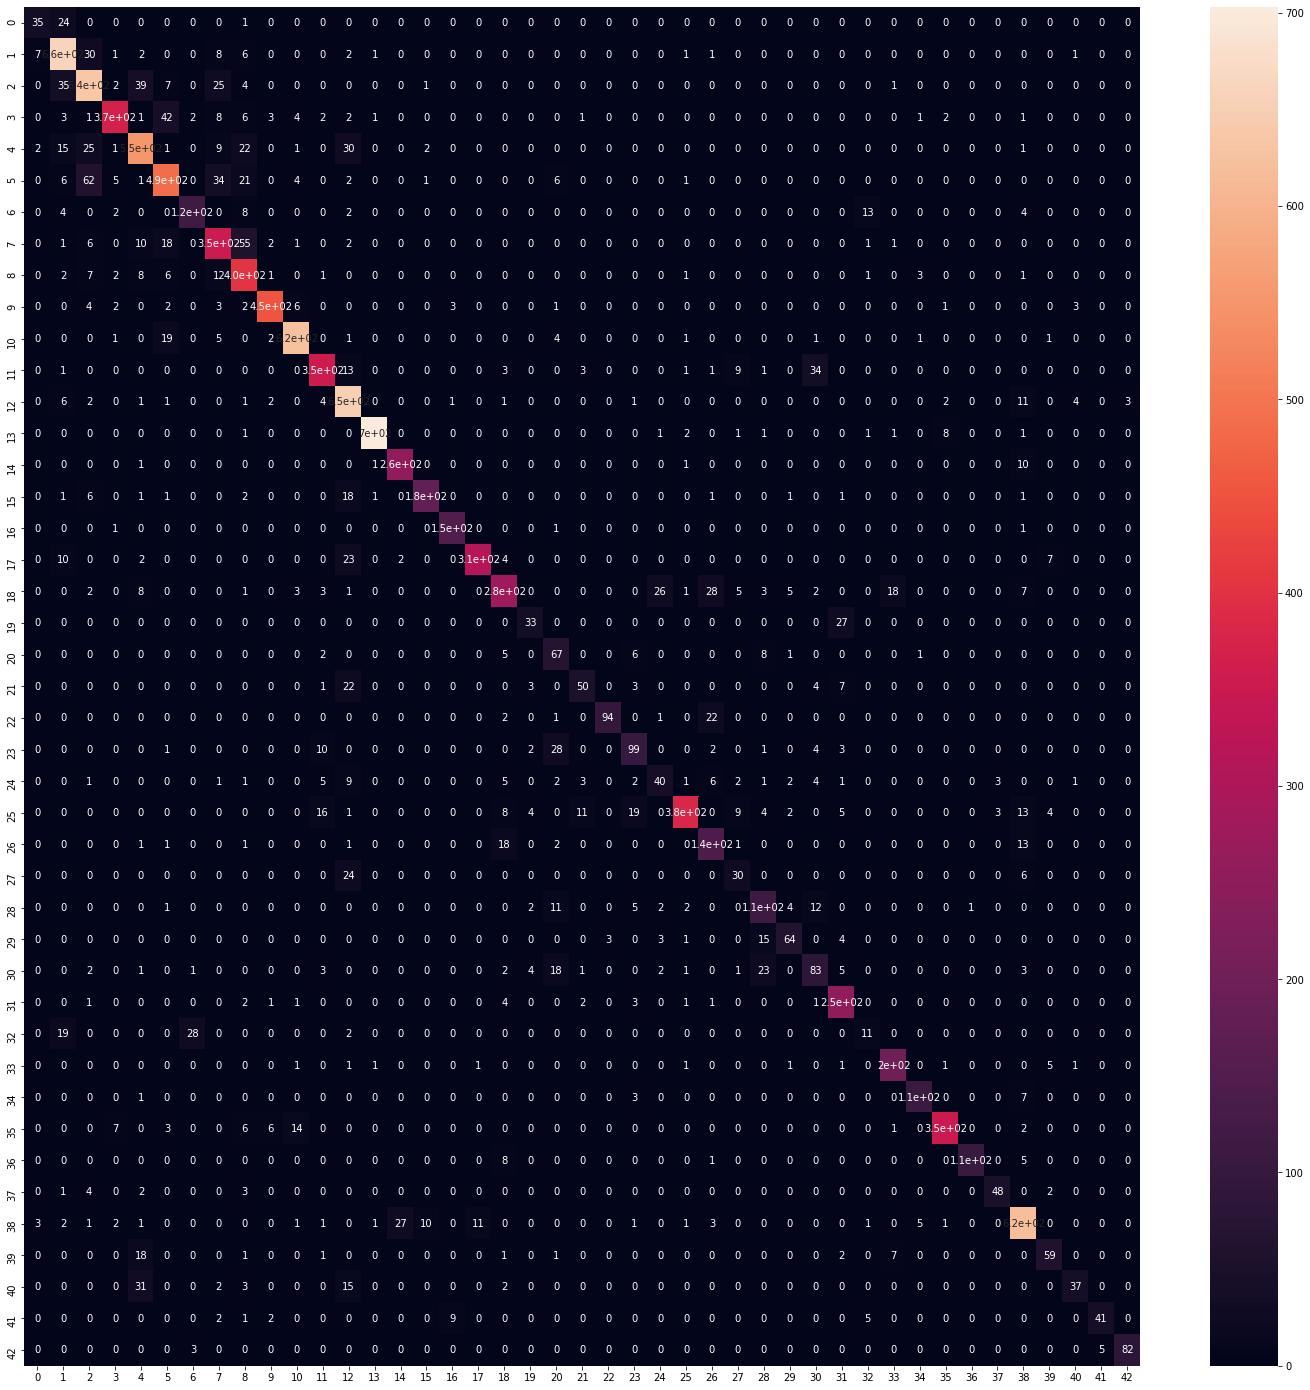

In [0]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

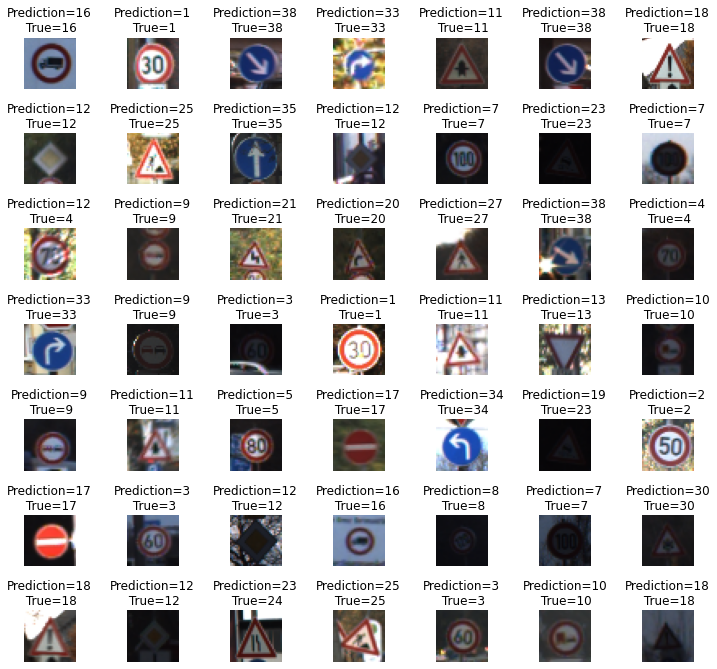

In [0]:
#plotting actual images vs the actual true label vs the predictions
L = 7          #length
W = 7          #width
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()               #flattening the axes array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')           #turning off the axis parameters

plt.subplots_adjust(wspace=1)     #spacing b/w images

# End